# Model Notebook


This is the notebook for the model in age gender detector. In this we will be extracting data, train it, and fit it in the model also evaluate and optimize the results

In [1]:
# Importing the Required Libraries
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


Extracting data from the dataset

Download dataset from kaggle, if the dataset is not found locally
https://www.kaggle.com/datasets/jangedoo/utkface-new

In [2]:
fldr = "./UTKFace"

In [3]:
import os
files = os.listdir(fldr)

Create List of Images from the dataset

In [4]:
ages =[]
genders=[]
images=[]

for file in files:
    age = int(file.split('_')[0])
    gender = int(file.split('_')[1])
    total = fldr +'/'+file
    print(total)
    image = cv2.imread(total)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)


./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

Create List of Age and Gender from the dataset

In [5]:
for file in files:
    age=int(file.split('_')[0])
    gender=int(file.split('_')[1])
    ages.append(age)
    genders.append(gender)

Checking the images, gender and age

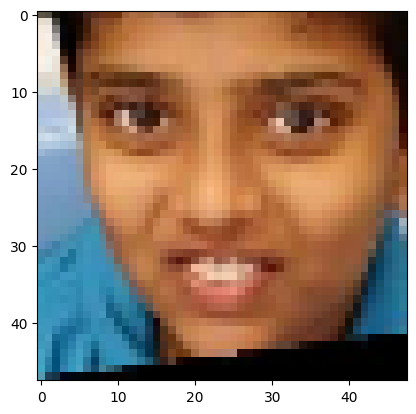

In [6]:
plt.imshow(images[99])

In [7]:
print(ages[99])

10


In [8]:
print(genders[99])

0


Saving Images, Ages and Genders in Arrays

In [9]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

np.save(fldr+'images.npy', images_f)
np.save(fldr+'ages.npy', ages_f)
np.save(fldr+'genders.npy', genders_f)

Finding the number of male and female in the dataset

In [10]:
values,counts = np.unique(genders_f, return_counts = True)
print(counts)

[12391 11317]


Plotting the Number of Male and Female Samples

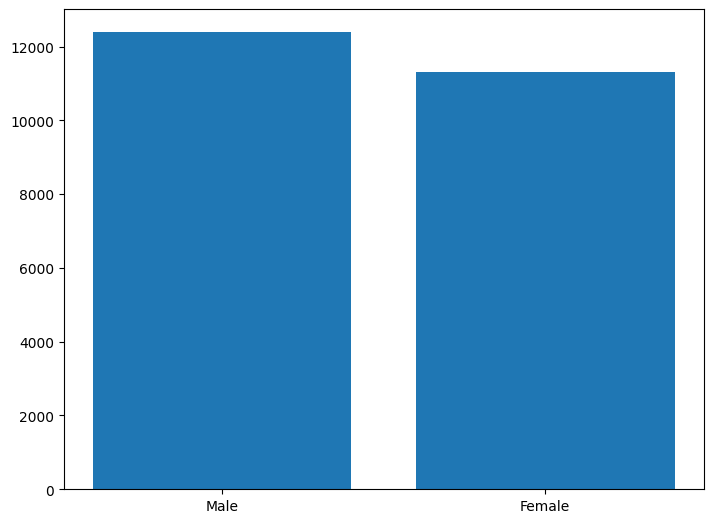

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values = [12391,11317]
ax.bar(gender,values)
plt.show()

Finding number of samples in age

In [12]:
values,counts = np.unique(ages_f, return_counts = True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


Plotting the samples age wise

In [13]:
# Converting age counts to list
val = values.tolist()
cnt = counts.tolist()

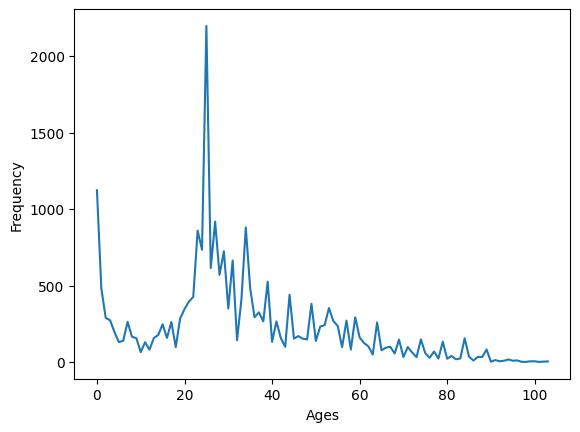

In [14]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel("Frequency")
plt.show()

Defining labels for the output

In [15]:
labels = []
i = 0
while i < len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i+1

Creating another list of images from the existing one

In [16]:
images_f_2 = images_f / 255
images_f_2.shape

(23708, 48, 48, 3)

In [17]:
labels_f = np.array(labels)

Importing train,test,split library from the sklearn for the training and testing purpose
## Splitting Test and Train


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25 )

In [20]:
Y_train[0:5]

array([[24,  1],
       [ 6,  0],
       [68,  0],
       [35,  1],
       [26,  0]])

Splitting Y_test and Y_train further for better understanding

In [21]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [22]:
Y_train_2[1][0:5]

array([24,  6, 68, 35, 26])

In [23]:
Y_train_2[0][0:5]

array([1, 0, 0, 1, 0])

## Defining the Model

In [24]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [25]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model

def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Conv2D(64, (3, 3), activation='relu')(maxp_1)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Conv2D(128, (3, 3), activation='relu')(maxp_2)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Conv2D(256, (3, 3), activation='relu')(maxp_3)
    maxp_5 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    conv_5 = Conv2D(256, (3, 3), activation='relu')(maxp_3)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_5)
    flatten = Flatten()(maxp_5)
    dense_1 = Dense(64, activation='swish')(flatten)
    dense_2 = Dense(64, activation='swish')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='swish', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy"])
    return model

In [26]:
my_model = model((48, 48, 3))

In [27]:
my_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 46, 46,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 23, 23,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 21, 21,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 10, 10,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 128) │     73,856 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 128) │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 2, 2, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 1, 1, 256) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 256)       │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     16,448 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │     16,448 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sex_out (Dense)     │ (None, 1)         │         65 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_out (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 421,442 (1.61 MB)

 Trainable params: 421,442 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## Initializing the Model

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint 

In [29]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=70,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

Running  the Model

In [30]:
my_model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy", "accuracy"])
History = my_model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - age_out_accuracy: 0.0441 - loss: 19.4685 - sex_out_accuracy: 0.5022
Epoch 1: val_loss improved from inf to 15.04102, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - age_out_accuracy: 0.0441 - loss: 19.4512 - sex_out_accuracy: 0.5022 - val_age_out_accuracy: 0.0454 - val_loss: 15.0410 - val_sex_out_accuracy: 0.5323
Epoch 2/250
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - age_out_accuracy: 0.0488 - loss: 15.3571 - sex_out_accuracy: 0.5197
Epoch 2: val_loss improved from 15.04102 to 13.50321, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - age_out_accuracy: 0.0488 - loss: 15.3552 - sex_out_accuracy: 0.5198 - val_age_out_accuracy: 0.0454 - val_loss: 13.5032 - val_sex_out_accuracy: 0.6867
Epoch 3/250
276/278 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - age_out_accuracy: 0.0427 - loss: 13.3448 - sex_out_accuracy: 0.6648
Epoch 3: val_loss improved from 13.50321 to 11.03154, sav

## Model Evaluation

In [31]:
my_model.evaluate(X_test, Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - age_out_accuracy: 0.0044 - loss: 6.9777 - sex_out_accuracy: 0.8796


[6.987616539001465, 0.004386704880744219, 0.8785220384597778]

In [32]:
pred = my_model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [33]:
pred[1]

array([[24.344791],
       [37.05852 ],
       [27.314108],
       ...,
       [27.690771],
       [ 5.335656],
       [61.93265 ]], dtype=float32)

Plotting Loss


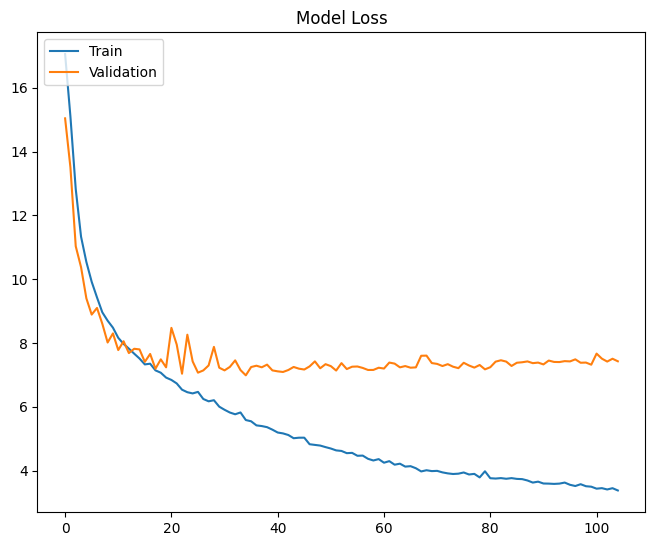

In [34]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

Plotting Sex Accuracy

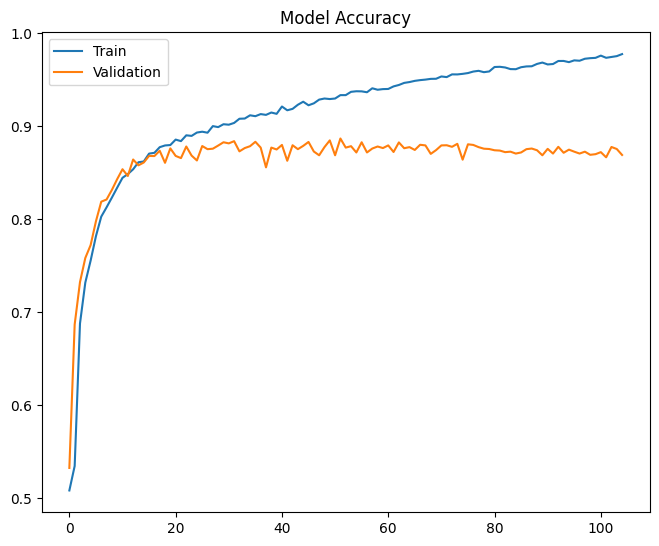

In [35]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlable=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=.95,left=0, hspace=0.25,wspace=0.35)

Plotting Gender Accuracy

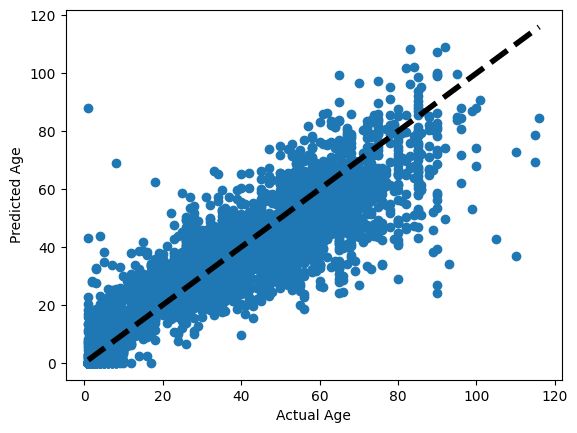

In [36]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(), Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()


## Making Report of the Model

In [37]:
i = 0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i = i + 1

C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\3296556949.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [39]:
report=classification_report(Y_test_2[0],Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3155
           1       0.86      0.88      0.87      2772

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



## Making Heatmap of the Model (Gender Only)

In [40]:
results = confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

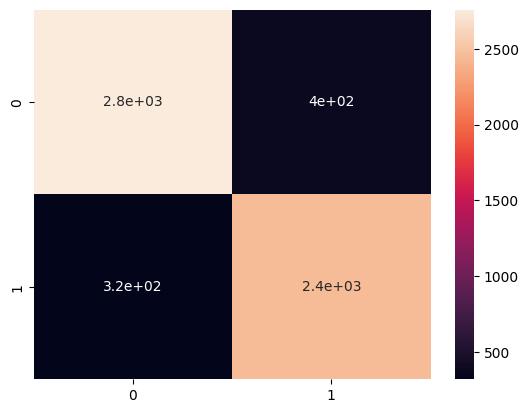

In [41]:
import seaborn as sns
sns.heatmap(results,annot=True)

Testing the Images Ourself

In [42]:
def test_image(ind,images_f,images_f_2,my_model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=my_model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

## Test 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Age is 92
Predicted Gender is Female


C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


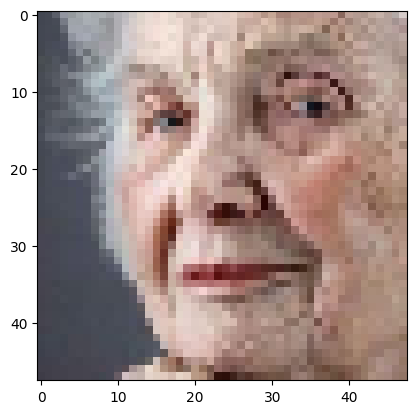

In [43]:
test_image(4,images_f,images_f_2,my_model)

## Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Age is 12
Predicted Gender is Male


C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


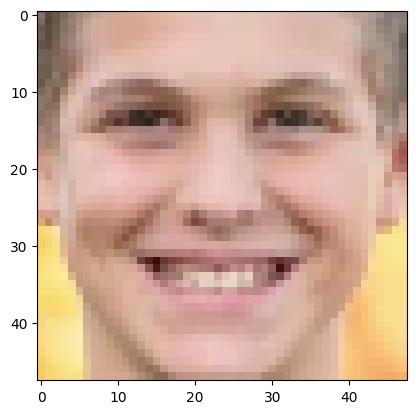

In [44]:
test_image(33,images_f,images_f_2,my_model)

## Test 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Age is 13
Predicted Gender is Female


C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


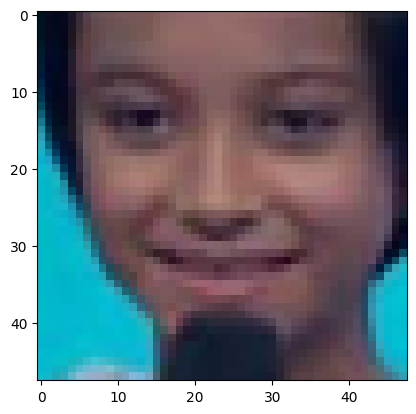

In [45]:
test_image(168,images_f,images_f_2,my_model)

## Test 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Age is 25
Predicted Gender is Male


C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


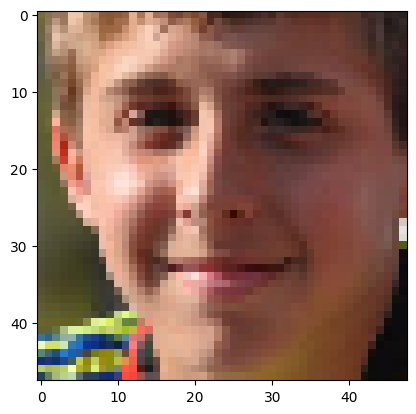

In [46]:
test_image(888,images_f,images_f_2,my_model)

## Test 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Age is 25
Predicted Gender is Female


C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


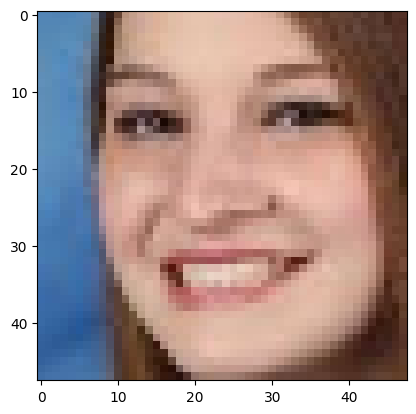

In [47]:
test_image(1288,images_f,images_f_2,my_model)

## Test 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Age is 30
Predicted Gender is Female


C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\yashw\AppData\Local\Temp\ipykernel_25140\927327870.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


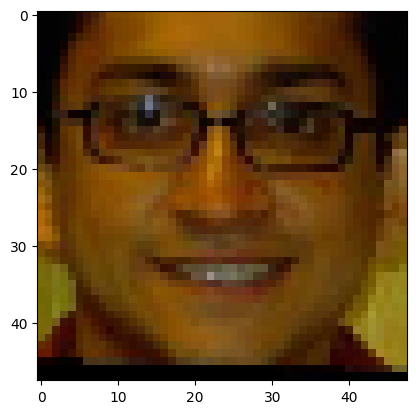

In [50]:
test_image(1500,images_f,images_f_2,my_model)